# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
from PIL import Image
import cv2
import numpy as np
import sys
import io

import pytesseract
# if you are running Windows and getting PATH related errors - refer to the article
# https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:
# Create an dictionary to store list of words and images
# { newspaper_image_name : [ [<list_of_words_in_the_image>] [<list_of_images_in_the_newspaper>] ] }

dict_of_newspaper_images_with_words = {} 

In [3]:
################################################################
##      Extracting words and images and storing in lists      ## 
################################################################

filepath = 'images.zip'
with zipfile.ZipFile(filepath) as archive:
    for idx, entry in enumerate(archive.infolist()):
        with archive.open(entry) as file:         
            
            # extracting words and creating a list
            image2 = np.array(Image.open(file))
            text = pytesseract.image_to_string(image2)
            word_list = text.strip().split()
            dict_of_newspaper_images_with_words[idx] = []
            dict_of_newspaper_images_with_words[idx].append(word_list)  
            
            # extracting images and creating a list
            image2 = np.array(Image.open(file))
            gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

            # loading the face detection classifier
            faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
            newspaper_full_image = faceCascade.detectMultiScale(
                 gray,
                 scaleFactor=1.3,
                 minNeighbors=3,
                 minSize=(30, 30)
             )
            image_list = []
            for x, y, w, h in newspaper_full_image:
                cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 0)
                roi_color = image2[y:y + h, x:x + w]
                image3 = Image.fromarray(roi_color)
                image_list.append(image3)
            dict_of_newspaper_images_with_words[idx].append(image_list)  

In [4]:
################################################################
##     Defining a function to output results
################################################################

def output_results(search_keyword):
    for idx, newspaper_file in enumerate(dict_of_newspaper_images_with_words):
        if search_keyword in dict_of_newspaper_images_with_words[newspaper_file][0]:
            if len (dict_of_newspaper_images_with_words[newspaper_file][1]) == 0:
                print('Results found in file a-{}.png \nBut there were no faces in the file\n'.format(idx))
            else: 
                print('Results found in file a-{}.png \n '.format(idx))
                first_images_new = dict_of_newspaper_images_with_words[0][1][0]
                first_images_new.thumbnail( (100,100 ))
                contact_sheet_new=Image.new(first_images_new.mode, (first_images_new.width*5,first_images_new.height*2))
                x=0
                y=0   
                
                for image2 in dict_of_newspaper_images_with_words[newspaper_file][1]:
                    image2.thumbnail( (100,100 ))
                    contact_sheet_new.paste(image2, (x, y) )
                    if x+first_images_new.width == contact_sheet_new.width:
                        x=0
                        y=y+first_images_new.height
                    else:
                        x=x+first_images_new.width  
                contact_sheet_new = contact_sheet_new.resize((int(contact_sheet_new.width),int(contact_sheet_new.height) ))
                display(contact_sheet_new)                                    
        else:
            print('Results not found in file a-{}.png\n'.format(idx))               


Please enter your search term here: Christopher
Results found in file a-0.png 
 


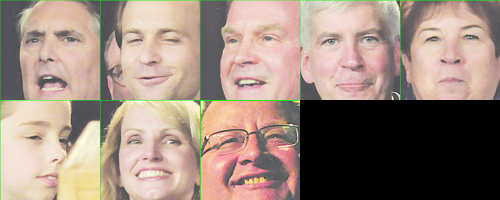

Results not found in file a-1.png

Results not found in file a-2.png



In [5]:
################################################################
##  Taking user input for the search keyword
################################################################

search_keyword = input('Please enter your search term here: ')
output_results(search_keyword)  

Please enter your search term here: Mark
Results found in file a-0.png 
 


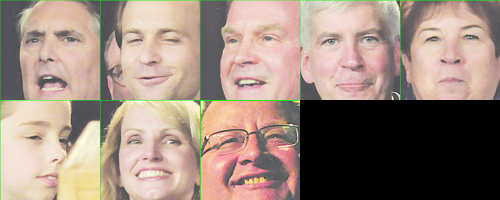

Results found in file a-1.png 
 


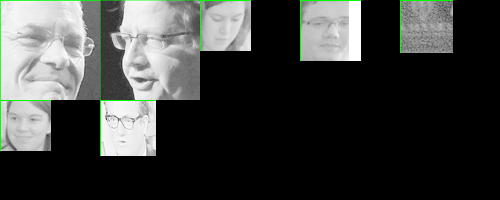

Results found in file a-2.png 
 


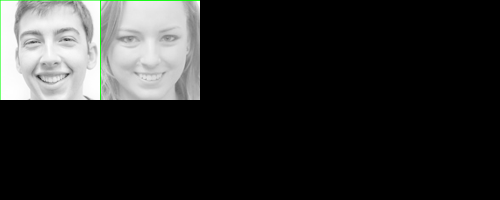

In [6]:
################################################################
##  Taking user input for the search keyword
################################################################

search_keyword = input('Please enter your search term here: ')
output_results(search_keyword)  